In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

%matplotlib inline

In [23]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)
df_type = df_add_topic
print(df_type.columns)


Index(['Unnamed: 0', 'cmpt_rank_str', 'crawl_id', 'directions_str',
       'meta_description', 'orient_str', 'qry', 'result_id', 'serp_id',
       'serp_id_y', 'serp_rank_str', 'snippet', 'subrank_str', 'title',
       'type_html', 'url', 'url_x', 'visible_text_score_t1',
       'allmeta_score_t1', 'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2', 'meta_des_score_t2',
       'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3', 'meta_des_score_t3',
       'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4', 'meta_des_score_t4',
       'gap_visible_t1', 'gap_all_t1', 'gap_visible_t2', 'gap_all_t2',
       'gap_visible_t3', 'gap_all_t3', 'gap_visible_t4', 'gap_all_t4',
       'domain_name', 'root', 'target', 'gap_abs_t1', 'gap_abs_t2',
       'gap_abs_t3', 'gap_abs

this is the len of dist:  258360
this is the len of dist:  258360
this is the len of dist:  126335


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is the len of dist:  126335


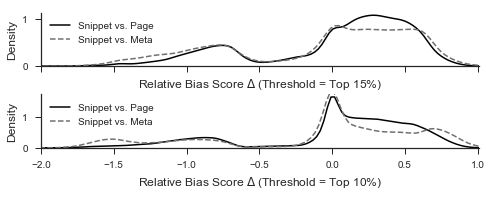

In [89]:

def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t
    
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"

df_add_party = pd.read_csv(path_add_party)

df = df_add_party

df["gap_abs_t1_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t1"], df["allmeta_score_t1"])
df["gap_abs_t2_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t2"], df["allmeta_score_t2"])
df["gap_abs_t3_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t3"], df["allmeta_score_t3"])
df["gap_abs_t4_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t4"], df["allmeta_score_t4"])


def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)

    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df["gap_abs_t1"], ax=ax[0], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df["gap_abs_t1_meta"], ax=ax[0], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['Snippet vs. Page', "Snippet vs. Meta"])
ax[0].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 15%)'),size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-2,1.01))


# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=0.8)

df = df_add_party
df2= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0)]

plot_bias_distribution(df2["gap_abs_t2"], ax=ax[1], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df2["gap_abs_t2_meta"], ax=ax[1], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].legend(['Snippet vs. Page', "Snippet vs. Meta"])
ax[1].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)'),size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-2,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Amplifying Score Distribution by Markup', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
#fig.savefig('bias_amplifying_score_by_meta.pdf', dpi=300)

this is the len of dist:  258360
this is the len of dist:  126335


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


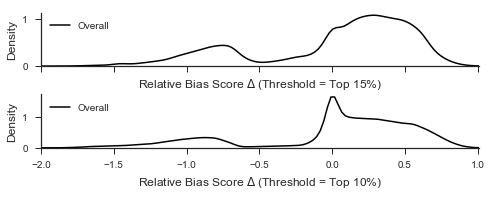

In [96]:

def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t
    
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"

df_add_party = pd.read_csv(path_add_party)

df = df_add_party

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)

    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df["gap_abs_t1"], ax=ax[0], color='k', label="-", linestyle="-", shade=False)
#plot_bias_distribution(df["gap_abs_t1_meta"], ax=ax[0], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['Overall'],loc=2)
ax[0].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 15%)'),size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-2,1.01))


df = df_add_party
df2= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0)]

plot_bias_distribution(df2["gap_abs_t2"], ax=ax[1], color='k', label="-", linestyle="-", shade=False)
#plot_bias_distribution(df2["gap_abs_t2_meta"], ax=ax[1], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].legend(['Overall'],loc=2)
ax[1].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)'),size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-2,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Amplifying Score Distribution by Markup', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('bias_amplifying_score_overall.pdf', dpi=300)

this is the len of dist:  246645
this is the len of dist:  246645


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is the len of dist:  113795
this is the len of dist:  113795


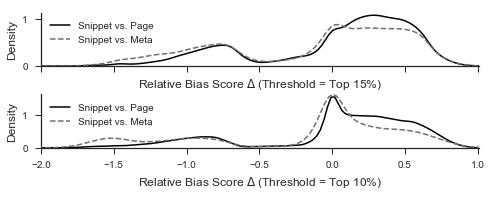

In [90]:

def get_gap_abs(s, t):
    if pd.isnull(s) or pd.isnull(t):
        return np.NaN
    elif s*t>=0:
        return abs(s)-abs(t)
    elif s>0 and t<0:
        return t-s
    elif s<0 and t>0:
        return s-t
    
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"

df_add_party = pd.read_csv(path_add_party)

df = df_add_party

df["gap_abs_t1_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t1"], df["allmeta_score_t1"])
df["gap_abs_t2_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t2"], df["allmeta_score_t2"])
df["gap_abs_t3_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t3"], df["allmeta_score_t3"])
df["gap_abs_t4_meta"]= np.vectorize(get_gap_abs)(df["snip_score_t4"], df["allmeta_score_t4"])


def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)
    

    
    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0) & (df["allmeta_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df["gap_abs_t1"], ax=ax[0], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df["gap_abs_t1_meta"], ax=ax[0], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['Snippet vs. Page', "Snippet vs. Meta"])
ax[0].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 15%)'),size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-2,1.01))


# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=0.8)

df = df_add_party
df2= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0) &(df["allmeta_score_t2"]!=0)]

plot_bias_distribution(df2["gap_abs_t2"], ax=ax[1], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df2["gap_abs_t2_meta"], ax=ax[1], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].legend(['Snippet vs. Page', "Snippet vs. Meta"], loc=2)
ax[1].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)'),size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-2,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Amplifying Score Distribution by Markup', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('bias_amplifying_score_by_meta.pdf', dpi=300)

In [ ]:
['Snippet vs. Page', "Snippet vs. Meta"]

In [ ]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_add_cleaned_topic_filter_t1_and_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)




In [60]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_party = pd.read_csv(path_add_party)
df_add_party.columns



Index(['Unnamed: 0', 'cmpt_rank_str', 'crawl_id', 'directions_str',
       'meta_description', 'orient_str', 'qry', 'result_id', 'serp_id',
       'serp_id_y', 'serp_rank_str', 'snippet', 'subrank_str', 'title',
       'type_html', 'url', 'url_x', 'visible_text_score_t1',
       'allmeta_score_t1', 'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2', 'meta_des_score_t2',
       'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3', 'meta_des_score_t3',
       'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4', 'meta_des_score_t4',
       'gap_visible_t1', 'gap_all_t1', 'gap_visible_t2', 'gap_all_t2',
       'gap_visible_t3', 'gap_all_t3', 'gap_visible_t4', 'gap_all_t4',
       'domain_name', 'root', 'target', 'gap_abs_t1', 'gap_abs_t2',
       'gap_abs_t3', 'gap_abs

this is the len of dist:  258360
this is the len of dist:  258360
this is the len of dist:  126335


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is the len of dist:  126335


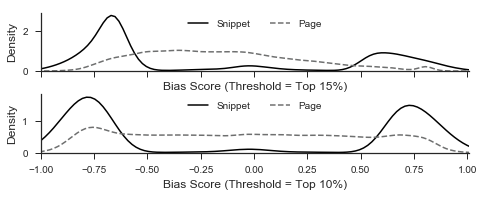

In [61]:

df = df_add_party

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)
    
    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df["snip_score_t1"], ax=ax[0], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df["visible_text_score_t1"], ax=ax[0], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['Snippet', "Page"], loc='center', bbox_to_anchor=(0.5, 0.8), ncol=2)
#ax[0].legend(['Left_leaning', "Right_leaning"], loc="upper left")
ax[0].set_xlabel('Bias Score (Threshold = Top 15%)',size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-1,1.01))


df = df_add_party
df= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0)]

plot_bias_distribution(df["snip_score_t2"], ax=ax[1], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df["visible_text_score_t2"], ax=ax[1], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
#ax[1].legend(['Left_leaning', "Right_leaning"])
ax[1].legend(['Snippet', "Page"], loc='center', bbox_to_anchor=(0.5, 0.8), ncol=2)
ax[1].set_xlabel('Bias Score (Threshold = Top 10%)',size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-1,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Score Distribution of Snippet and Page Text', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('overall_bias_bias_score_distribution_of_snippet_and_text.pdf', dpi=300)

this is the len of dist:  123481
this is the len of dist:  100834


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is the len of dist:  59456
this is the len of dist:  49966


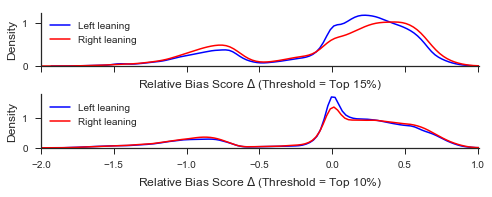

In [92]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"

df_add_party = pd.read_csv(path_add_party)

df = df_add_party

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)

    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df[df["party"]=="dem"]["gap_abs_t1"], ax=ax[0], color='b', label="-", linestyle="-", shade=False)
plot_bias_distribution(df[df["party"]=="rep"]["gap_abs_t1"], ax=ax[0], color='r', label="-", linestyle="-", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['Left leaning', "Right leaning"])
ax[0].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 15%)'),size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-2,1.01))


df = df_add_party
df= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0)]

plot_bias_distribution(df[df["party"]=="dem"]["gap_abs_t2"], ax=ax[1], color='b', label="-", linestyle="-", shade=False)
plot_bias_distribution(df[df["party"]=="rep"]["gap_abs_t2"], ax=ax[1], color='r', label="-", linestyle="-", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].legend(['Left leaning', "Right leaning"])
ax[1].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)'),size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-2,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('bias_amplifying_score_by_general_type.pdf', dpi=300)
#('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)')

In [26]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_party = pd.read_csv(path_add_party)
df=df_add_party
df_dem = df[df["party"]=="dem"]["gap_abs_t1"].tolist()
print(len(df_dem))
df_rep = df[df["party"]=="rep"]["gap_abs_t1"].tolist()
print(len(df_rep))

df_dem_positive = df[(df["party"]=="dem") & (df["gap_abs_t1"]>0)]["gap_abs_t1"].tolist()
print(len(df_dem_positive))
df_rep_positive = df[(df["party"]=="rep") & (df["gap_abs_t1"]>0)]["gap_abs_t1"].tolist()

print(len(df_rep_positive))
from scipy import stats
print("all range", stats.ks_2samp(df_rep, df_dem))
print("\n\n")
print("only for the  positive", stats.ks_2samp(df_dem_positive, df_rep_positive))



123481
100834
83763
64134
all range Ks_2sampResult(statistic=0.05551037716569729, pvalue=3.852863775542281e-149)



only for the  positive Ks_2sampResult(statistic=0.10441319426528817, pvalue=0.0)


this is the len of dist:  215331
this is the len of dist:  43029


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is the len of dist:  106793
this is the len of dist:  19542


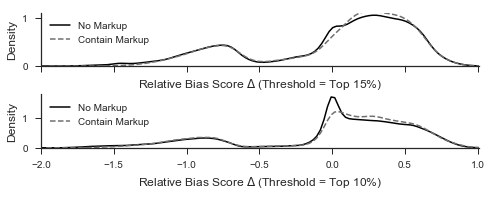

In [93]:
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"

df_add_party = pd.read_csv(path_add_party)

df = df_add_party

def plot_bias_distribution(dist, ax, color='#3B3838', label='',
                           linestyle='-', alpha=1, shade=True):
    print("this is the len of dist: ", len(dist))
    ax = sns.kdeplot(dist, color=color, shade=False, alpha=alpha,
                     ax=ax,linestyle=linestyle, linewidth=1.5, label=label)
   
    return ax


df= df[(df["visible_text_score_t1"]!=0) & (df["snip_score_t1"]!=0)]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7,3.0))

plot_bias_distribution(df[pd.isnull(df["Markup_Category"])]["gap_abs_t1"], ax=ax[0], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df[~pd.isnull(df["Markup_Category"])]["gap_abs_t1"], ax=ax[0], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].legend(['No Markup', "Contain Markup"])
ax[0].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 15%)'),size=12, labelpad=10)
ax[0].set_ylabel('Density',size=12, labelpad=5)
ax[0].set(xlim=(-2,1.01))




df = df_add_party
df= df[(df["visible_text_score_t2"]!=0) & (df["snip_score_t2"]!=0)]

plot_bias_distribution(df[pd.isnull(df["Markup_Category"])]["gap_abs_t2"], ax=ax[1], color='k', label="-", linestyle="-", shade=False)
plot_bias_distribution(df[~pd.isnull(df["Markup_Category"])]["gap_abs_t2"], ax=ax[1], color='#6e6f6f', label="--", linestyle="--", shade=False)
ax[1].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].legend(['No Markup', "Contain Markup"])
ax[1].set_xlabel(('Relative Bias Score ' +  r'$\Delta$'+' (Threshold = Top 10%)'),size=12, labelpad=5)
ax[1].set_ylabel('Density',size=12, labelpad=5)
ax[1].set(xlim=(-2,1.01))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=9.6)
#fig.suptitle('Bias Amplifying Score Distribution by Markup', fontsize=12, x=.5, y=1)
fig.tight_layout(h_pad=-0.8)
fig.savefig('bias_amplifying_score_by_markup.pdf', dpi=300)

In [ ]:
df[pd.isnull(df["Markup_Category"])]["gap_abs_t1"]

31
Index(['Unnamed: 0', 'Unnamed: 0.1', 'root_topic', 'pro_snip_text_am',
       'pro_snip_text_de', 'pro_snip_text_fl', 'pro_snip_text_same',
       'new_root_topic'],
      dtype='object')
31
Index(['Unnamed: 0', 'Unnamed: 0.1', 'root_topic', 'pro_snip_text_am',
       'pro_snip_text_de', 'pro_snip_text_fl', 'pro_snip_text_same',
       'new_root_topic'],
      dtype='object')
df_t1 after:  30
df_t1 after:  30
df_t1 after:  Index(['Amplify', 'Unchanged', 'Decrease', 'Flip'], dtype='object')
                  Amplify  Unchanged  Decrease      Flip
new_root_topic                                          
Pregnancy        0.575355   0.160190  0.043602  0.220853
American         0.529865   0.214644  0.054721  0.200771
Cabinet          0.558232   0.086770  0.044540  0.310459
Candidates       0.584961   0.128983  0.043296  0.242760
Debt             0.623331   0.173535  0.035984  0.167150
Discrimination   0.590099   0.270627  0.037624  0.101650
Econ. Concerns   0.524042   0.156479  0.053790

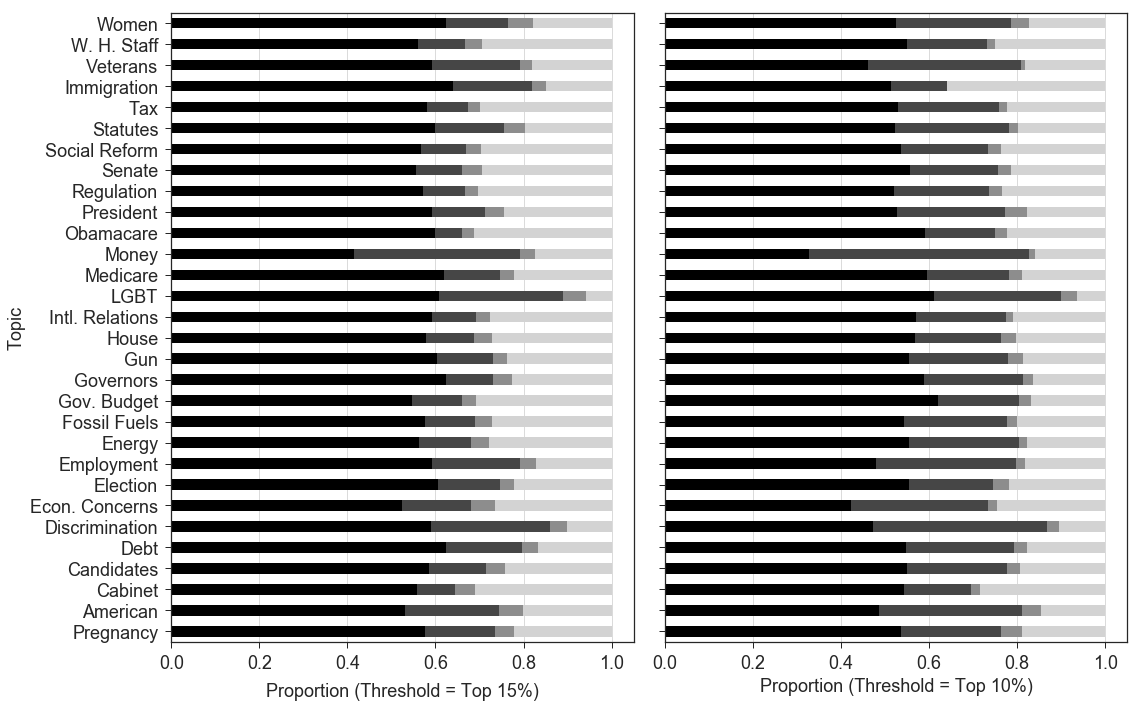

In [328]:
df_t1 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/R-process/revised_amplifying_type_percent_by_topic_no_party_t1.csv")

df_t2 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/R-process/revised_amplifying_type_percent_by_topic_no_party_t2.csv")
print(len(df_t1))
print(df_t1.columns)
print(len(df_t2))

print(df_t2.columns)

df_t1 = df_t1[(pd.notnull(df_t1["root_topic"])) & (df_t1["root_topic"]!="Null")]

print("df_t1 after: ",len(df_t1))
df_t1.set_index('new_root_topic',inplace=True)
df_t1.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip','pro_snip_text_same':'Unchanged'}, inplace=True)
df_t1= df_t1[['Amplify', 'Unchanged', 'Decrease', 'Flip']]
print("df_t1 after: ",len(df_t1))
print("df_t1 after: ",df_t1.columns)
print(df_t1)

df_t2 = df_t2[(pd.notnull(df_t2["root_topic"])) & (df_t2["root_topic"]!="Null")]
df_t2.set_index('new_root_topic',inplace=True)
df_t2.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip','pro_snip_text_same':'Unchanged'}, inplace=True)
df_t2= df_t2[['Amplify', 'Unchanged','Decrease', 'Flip']]


print("df_t2 after: ",len(df_t2))
print("df_t2 after: ",df_t2.columns)
print(df_t2)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(16,10))


from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap1=LinearSegmentedColormap.from_list('rg',l, N=256)


#ax1 = plt.figure(figsize=(10, 6)).add_subplot(121)
df_t1.plot(ax=ax[0], kind='barh', legend=False, stacked=True,colormap=cmap1)



ax[0].set_xlabel('Proportion (Threshold = Top 15%)',size=18, labelpad=10)
ax[0].set_ylabel('Topic',size=18, labelpad=5)

plt.setp(ax[0].get_yticklabels(), size=18, horizontalalignment='right')
plt.setp(ax[0].get_xticklabels(), size=18,visible=True) 
ax[0].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)


from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)


#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_t2.plot(ax=ax[1], kind='barh', legend=False, stacked=True,colormap=cmap2)


#ax[1].legend(loc='center right', bbox_to_anchor=(1.0, 1.02), ncol=4,fontsize=14)
ax[1].set_xlabel('Proportion (Threshold = Top 10%)',size=18, labelpad=5)


ax[1].set_ylabel(' ',size=2, labelpad=5)
plt.setp(ax[1].get_yticklabels(), visible=False)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax[1].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax[1].get_xticklabels(), size=18,visible=True) 
plt.setp(ax[1].get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=6.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page Text by Topics \nand Leaning-Type(Red=Right_leaning Query, Blue=Left_leaning Query)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
fig.savefig('bias_effect_type_by_topic_and_no_party_leaning_type_top_10_and_top_15.pdf', dpi=300)

In [293]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_add_cleaned_topic_filter_t1_and_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)

In [4]:
import pandas as pd
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_add_cleaned_topic_filter_t1_and_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)

df_type = df_add_topic
print(df_type.columns)



Index(['Unnamed: 0', 'cmpt_rank_str', 'crawl_id', 'directions_str',
       'meta_description', 'orient_str', 'qry', 'result_id', 'serp_id',
       'serp_id_y', 'serp_rank_str', 'snippet', 'subrank_str', 'title',
       'type_html', 'url', 'url_x', 'visible_text_score_t1',
       'allmeta_score_t1', 'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2', 'meta_des_score_t2',
       'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3', 'meta_des_score_t3',
       'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4', 'meta_des_score_t4',
       'gap_visible_t1', 'gap_all_t1', 'gap_visible_t2', 'gap_all_t2',
       'gap_visible_t3', 'gap_all_t3', 'gap_visible_t4', 'gap_all_t4',
       'domain_name', 'root', 'target', 'gap_abs_t1', 'gap_abs_t2',
       'gap_abs_t3', 'gap_abs

# Amplifying Type Perc By Topics

In [293]:
df_t1 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/start_result/third_try_output_add_root_no_rank_drop_dup/r-plot/amplifying_type_percent_by_topic_t1.csv")
print(df_t1.columns)
print(len(df_t1))

Index(['Unnamed: 0', 'root_topic', 'party', 'pro_snip_text_am',
       'pro_snip_text_de', 'pro_snip_text_fl', 'pro_snip_meta_am',
       'pro_snip_meta_de', 'pro_snip_meta_fl'],
      dtype='object')
53


In [291]:
df_t1.head()

,Unnamed: 0,root_topic,party,pro_snip_text_am,pro_snip_text_de,pro_snip_text_fl,pro_snip_meta_am,pro_snip_meta_de,pro_snip_meta_fl
0,1,Abortion,dem,0.617747,0.064846,0.317406,0.460751,0.136519,0.402730
1,2,Abortion,rep,0.675347,0.131944,0.192708,0.668403,0.059028,0.272569
2,3,Act,dem,0.668936,0.105817,0.225248,0.607054,0.129950,0.262995
3,4,Act,rep,0.673575,0.067358,0.259067,0.642487,0.108808,0.248705
4,5,American,dem,0.659642,0.109589,0.230769,0.601686,0.124341,0.273973


In [387]:
df_t1 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/start_result/third_try_output_add_root_no_rank_drop_dup/r-plot/amplifying_type_percent_by_topic_t1.csv")
print(len(df_t1))
print(pd.isnull(df_t1["root_topic"].iloc[52]))
for i in range(len(df_t1)):
    if pd.isnull(df_t1["root_topic"].iloc[i]):
        print("this is :",i)
df_t1 = df_t1[(pd.notnull(df_t1["root_topic"])) & (df_t1["root_topic"]!="Null")]
print(len(df_t1))
df2= df_t1[df_t1.duplicated(subset ="root_topic", keep=False)]
print(len(df2))
r = list(range(int(len(df2)/2)))
print(r)


53
True
this is : 51
this is : 52
49
44
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


original len 56
False
after filtering  54
number of root query that have two sides, should be ou shu:  48
Index(['new_root_topic', 'Amplify', 'Decrease', 'Flip', 'Unchanged'], dtype='object')
                  Amplify  Unchanged  Decrease      Flip
new_root_topic                                          
Pregnancy        0.619883   0.064327  0.046784  0.269006
American         0.576561   0.181352  0.046193  0.195894
Candidates       0.591186   0.135444  0.042684  0.230686
Debt             0.630167   0.181291  0.039884  0.148658
Econ. Concerns   0.490234   0.199219  0.050781  0.259766
Election         0.617148   0.136672  0.031409  0.214771
Employment       0.586679   0.225957  0.033302  0.154062
Energy           0.586885   0.163934  0.042623  0.206557
Fossil Fuels     0.614925   0.152239  0.058209  0.174627
Gov. Budget      0.529976   0.103118  0.031175  0.335731
Governors        0.644172   0.096115  0.049761  0.209952
Gun              0.592635   0.135411  0.033994  0.237960
House     

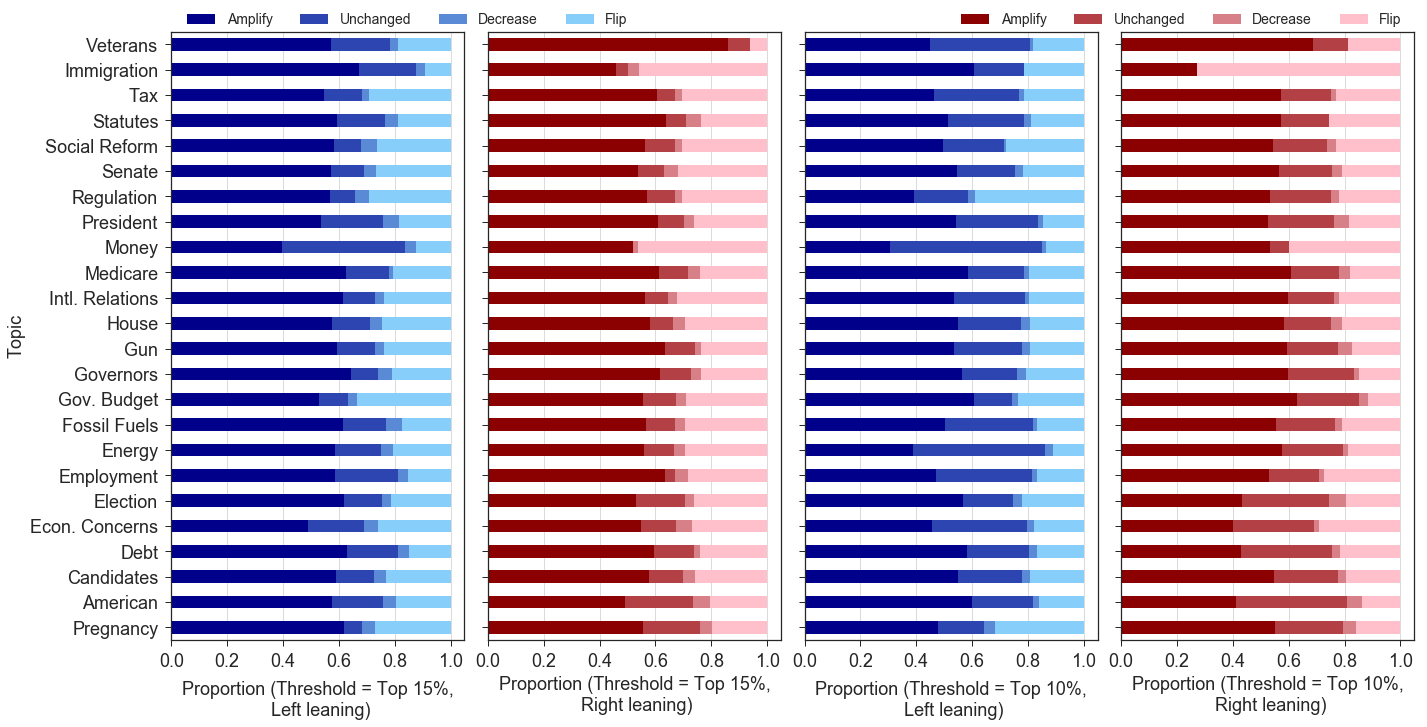

In [158]:
df_t1 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/R-process/revised_amplifying_type_percent_by_topic_t1.csv")
print("original len", len(df_t1))
print(pd.isnull(df_t1["root_topic"].iloc[52]))
for i in range(len(df_t1)):
    if pd.isnull(df_t1["root_topic"].iloc[i]):
        print("this is containing null root topic :",i)
df_t1 = df_t1[(pd.notnull(df_t1["root_topic"])) & (df_t1["root_topic"]!="Null")]
print("after filtering ", len(df_t1))
df2= df_t1[df_t1.duplicated(subset ="root_topic", keep=False)]
df_dem_t1 = df2[df2["party"]=="dem"]
print("number of root query that have two sides, should be ou shu: ", len(df2))
df_dem_t1 = df_dem_t1[["new_root_topic", 'pro_snip_text_am', "pro_snip_text_de", "pro_snip_text_fl", "pro_snip_text_same"]]
df_dem_t1.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip', "pro_snip_text_same":"Unchanged"}, inplace=True)



print(df_dem_t1.columns)
df_dem_t1.set_index('new_root_topic',inplace=True)
df_dem_t1= df_dem_t1[['Amplify', 'Unchanged','Decrease', 'Flip']]

print(df_dem_t1)


df_rep_t1 = df2[df2["party"]=="rep"]
print(len(df2))
df_rep_t1 = df_rep_t1[["new_root_topic", 'pro_snip_text_am', "pro_snip_text_de", "pro_snip_text_fl","pro_snip_text_same"]]
df_rep_t1.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip',"pro_snip_text_same":"Unchanged"}, inplace=True)



print(df_rep_t1.columns)
df_rep_t1.set_index('new_root_topic',inplace=True)
df_rep_t1= df_rep_t1[['Amplify', 'Unchanged','Decrease', 'Flip']]



df_t10 = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/R-process/revised_amplifying_type_percent_by_topic_t2.csv")
print("original len", len(df_t10))
print(pd.isnull(df_t10["root_topic"].iloc[52]))
for i in range(len(df_t10)):
    if pd.isnull(df_t10["root_topic"].iloc[i]):
        print("this is containing null root topic :",i)
df_t10 = df_t10[(pd.notnull(df_t10["root_topic"])) & (df_t10["root_topic"]!="Null")]
print("after filtering ", len(df_t10))
df20= df_t10[df_t10.duplicated(subset ="root_topic", keep=False)]
df_dem_t2 = df20[df20["party"]=="dem"]
print("number of root query that have two sides, should be ou shu: ", len(df20))
df_dem_t2 = df_dem_t2[["new_root_topic", 'pro_snip_text_am', "pro_snip_text_de", "pro_snip_text_fl","pro_snip_text_same"]]
df_dem_t2.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip',"pro_snip_text_same":"Unchanged"}, inplace=True)


print(df_dem_t2.columns)
df_dem_t2.set_index('new_root_topic',inplace=True)
df_dem_t2= df_dem_t2[['Amplify', 'Unchanged','Decrease', 'Flip']]

print(df_dem_t2)



df_rep_t2 = df20[df20["party"]=="rep"]
print(len(df20))
df_rep_t2 = df_rep_t2[["new_root_topic", 'pro_snip_text_am', "pro_snip_text_de", "pro_snip_text_fl","pro_snip_text_same"]]
df_rep_t2.rename(columns={'pro_snip_text_am':'Amplify', 'pro_snip_text_de':'Decrease', 'pro_snip_text_fl':'Flip',"pro_snip_text_same":"Unchanged"}, inplace=True)



print(df_rep_t2.columns)
df_rep_t2.set_index('new_root_topic',inplace=True)
df_rep_t2= df_rep_t2[['Amplify', 'Unchanged','Decrease', 'Flip']]



fig, ax = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(20,10))


from  matplotlib.colors import LinearSegmentedColormap
c = ['darkblue', 'lightskyblue']
v = list(range(len(c)))
l = list(zip(v,c))
cmap1=LinearSegmentedColormap.from_list('rg',l, N=256)

df_dem_t1.plot(ax=ax[0], kind='barh', legend=False, stacked=True,colormap=cmap1)



ax[0].legend(loc='center right', bbox_to_anchor=(1.6, 1.02), ncol=4,fontsize=14)
ax[0].set_xlabel('Proportion (Threshold = Top 15%,\n Left leaning)',size=18, labelpad=10)
ax[0].set_ylabel('Topic',size=18, labelpad=5)
plt.setp(ax[0].get_xticklabels(), size=18,visible=True) # plt.setp(ax[1].get_xticklabels(), size=18,visible=True) 
plt.setp(ax[0].get_yticklabels(), size=18, horizontalalignment='right')
ax[0].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)


from  matplotlib.colors import LinearSegmentedColormap
c = ['darkred', 'pink']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)


df_rep_t1.plot(ax=ax[1], kind='barh', legend=False, stacked=True,colormap=cmap2)


ax[1].set_xlabel('Proportion (Threshold = Top 15%,\n Right leaning)',size=18, labelpad=5)
ax[1].set_ylabel(' ',size=2, labelpad=5)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax[1].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax[1].get_yticklabels(), visible=False)
plt.setp(ax[1].get_xticklabels(), size=18,visible=True)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=6.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page Text by Topics \nand Leaning-Type(Red=Right_leaning Query, Blue=Left_leaning Query), Threshold = Top 15%", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)



df_dem_t2.plot(ax=ax[2], kind='barh', legend=False, stacked=True,colormap=cmap1)

ax[2].set_xlabel('Proportion (Threshold = Top 10%,\n Left leaning)',size=18, labelpad=10)
ax[2].set_ylabel(' ',size=2, labelpad=5)

plt.setp(ax[2].get_xticklabels(), size=18,visible=True)
plt.setp(ax[2].get_yticklabels(), visible=False)

ax[2].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)


from  matplotlib.colors import LinearSegmentedColormap
c = ['darkred', 'pink']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)


#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_rep_t2.plot(ax=ax[3], kind='barh', legend=False, stacked=True,colormap=cmap2)



ax[3].legend(loc='center right', bbox_to_anchor=(1.0, 1.02), fontsize =14, ncol=4)
ax[3].set_xlabel('Proportion (Threshold = Top 10%,\n Right leaning)',size=18, labelpad=5)
ax[3].set_ylabel('  ',size=2, labelpad=5)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax[3].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax[3].get_yticklabels(), visible=False)
plt.setp(ax[3].get_xticklabels(), size=18,visible=True)
#plt.setp(ax[3].get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.08, hspace=6.6)



fig.savefig('bias_effect_type_by_topic_and_leaning_type_top_15_and_top_10.pdf', dpi=300)



In [216]:

path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"

df_add_topic = pd.read_csv(path_add_party_and_topic)

In [258]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)
df_type = df_add_topic

# Linear relationship between snippet and text 

## Correlation (Threshold = Top 15%)

this is snippet mean for t1: -0.21859003717416606
this is text mean for t1: -0.1524081264875176
Spearmans Correlation
0.504084167767217 0.0
len of df ori:  258360
len of df sample: 

/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


 5167
this is ax.legend:  None
THIS IS AX: AxesSubplot(0.151058,0.862469;0.715603x0.093642)


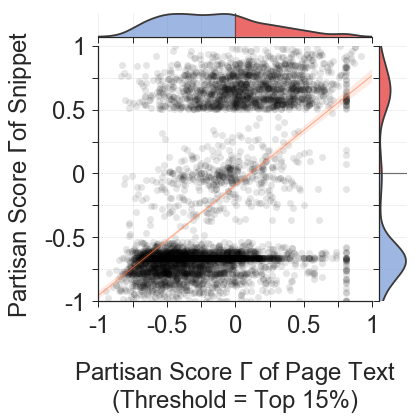

In [86]:
joint_kws = {
    'scatter_kws':{
        'alpha': 0.1,
        'facecolor': 'black', 
        'edgecolor': 'black',
#         's': ((allscores["rep_p"] + allscores["dem_p"]) * 40000).values
    },
    'line_kws':{
        'alpha': 0.7,
        'color': 'coral',
        'linewidth':0.9
    }
}
marginal_kws = {
    'hist':False,
    'kde_kws':{
        'shade':True, 
        'color':'gray',
        'alpha':0.3
    }
}

def bias_kde_ax(ax, axis='x'):
    # Extract coordinates
    if axis=='x':
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = x >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = x <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')

        # Style
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
        print("this is ax.legend: ",ax.legend())
        print("THIS IS AX:", ax)
        if ax.legend() is not None:
            ax.legend().remove()
        ax.tick_params(axis='x')
        ax.axvline(x=0, color='#3B3838', alpha=0.7, linewidth=1.2)
        ax.grid(b=True, axis='x', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)
    
    elif axis=='y':
        line = ax.get_lines()[-1]
        x, y = line.get_data()

        # Shade regions by selecting those points and calling ax.fill_between:
        mask = y >= -0.005
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')
        mask = y <= 0.01
        _x, _y = x[mask], y[mask]
        ax.fill_between(_x, y1=_y, alpha=0.5, facecolor='cornflowerblue')

        # Style
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set(color='#DDDEDE', alpha=0.75, linewidth=0.75)
        if ax.legend() is not None:
            ax.legend().remove()
        ax.tick_params(axis='x')
        ax.axhline(y=0, color='#3B3838', alpha=0.7, linewidth=1.2)
        ax.grid(b=True, axis='y', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)

    return ax

def jointplot_correlation(x, y, data, xlim=(-1,1), ylim=(-1,1), ax=''):
    if ax:
        g = sns.jointplot(x, y, data, 
                      kind='reg', xlim=xlim, ylim=ylim, 
                      ratio=8, space=0, stat_func=None,
                      joint_kws=joint_kws,
                      marginal_kws=marginal_kws, 
                      ax=ax)
    else:
        g = sns.jointplot(x, y, data, 
                          kind='reg', xlim=xlim, ylim=ylim, 
                          ratio=8, space=0, stat_func=None,
                          joint_kws=joint_kws,
                          marginal_kws=marginal_kws)
    g.ax_joint.grid(b=True, axis='both', which='major', color='#DDDEDE', alpha=0.75, linewidth=0.6)

    return g

import scipy.stats as st
path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
#path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_party = pd.read_csv(path_add_party)

#df_add_party = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/start_result/third_try_output_add_root_no_rank_drop_dup/third_try_text_meta_snippet_score_remove_nan_gap_visible_t1_add_root.csv")
df_add_party = df_add_party[(df_add_party["visible_text_score_t1"]!=0) & (df_add_party["snip_score_t1"]!=0)]
df_add_party = df_add_party[(pd.notnull(df_add_party["visible_text_score_t1"])) & (pd.notnull(df_add_party["snip_score_t1"]))]
print("this is snippet mean for t1:", np.mean(df_add_party["snip_score_t1"].tolist()))
print("this is text mean for t1:", np.mean(df_add_party["visible_text_score_t1"].tolist()))
rho, p = st.spearmanr(df_add_party["visible_text_score_t1"], df_add_party["snip_score_t1"])
print('Spearmans Correlation')
print(rho, p)

print("len of df ori: ", len(df_add_party))

df_add_party_sample = df_add_party.sample(frac=0.02)
print("len of df sample: ", len(df_add_party_sample))

# Config plots

sns.set(font_scale=1, style='ticks')
axis_labels = ['-1','','-0.5','','0','','0.5','','1']
font_size = 24



g = jointplot_correlation("visible_text_score_t1", "snip_score_t1", df_add_party_sample)

g.plot_marginals(sns.kdeplot,color='#3B3838', linestyle='-', alpha=1, shade=False)
g.ax_marg_x = bias_kde_ax(g.ax_marg_x,axis='x')
g.ax_marg_y = bias_kde_ax(g.ax_marg_y,axis='y')
g.ax_joint.set(ylim=(-1,1), yticklabels=axis_labels, 
               xlim=(-1,1), xticklabels=axis_labels)

g.ax_joint.set_yticklabels(axis_labels, size=font_size)
g.ax_joint.set_xticklabels(axis_labels, size=font_size)
g.ax_joint.set_ylabel(('Partisan Score ' +  r'$\Gamma$'+'of Snippet'), size=font_size, labelpad=10)
g.ax_joint.set_xlabel(('Partisan Score '+ r'$\Gamma$'+' of Page Text\n(Threshold = Top 15%)'), size=font_size, labelpad=20)

#plt.suptitle('Relationship between Bias Scores of Snippet and Non_Meta \n Text (Threshold = Top 15%)',
      #      y=1.05)
# Save
plt.tight_layout(h_pad=-0.5, w_pad=-0.5)
plt.savefig('t1_correlation.pdf', dpi=300)

#$\gamma$




## Correlation (Threshold = Top 10%)

this is snippet mean for t2: -0.06260349221646688
this is text mean for t2: -0.05724389936388018
Spearmans Correlation
0.6280152512224104 0.0
before,  126335
sample:  6317


/Users/deshenghu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


this is ax.legend:  None
THIS IS AX: AxesSubplot(0.151058,0.862469;0.715603x0.093642)


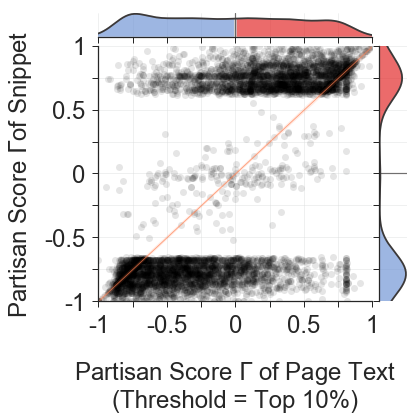

In [85]:

path_add_party = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/re-geneate-ampliyfing-type/new_final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"


df_add_party = pd.read_csv(path_add_party)
df_add_party_t2 = df_add_party[(df_add_party["visible_text_score_t2"]!=0) & (df_add_party["snip_score_t2"]!=0)]
df_add_party_t2 = df_add_party_t2[(pd.notnull(df_add_party_t2["visible_text_score_t2"])) & (pd.notnull(df_add_party_t2["snip_score_t2"]))]
# Config plots

print("this is snippet mean for t2:", np.mean(df_add_party_t2["snip_score_t2"].tolist()))
print("this is text mean for t2:", np.mean(df_add_party_t2["visible_text_score_t2"].tolist()))




rho, p = st.spearmanr(df_add_party_t2["visible_text_score_t2"], df_add_party_t2["snip_score_t2"])
print('Spearmans Correlation')
print(rho, p)


sns.set(font_scale=1, style='ticks')
axis_labels = ['-1','','-0.5','','0','','0.5','','1']
font_size = 24
print("before, ", len(df_add_party_t2))

df_add_party_sample_t2 = df_add_party_t2.sample(frac=0.05)
print("sample: ", len(df_add_party_sample_t2))


g = jointplot_correlation("visible_text_score_t2", "snip_score_t2", df_add_party_sample_t2)

g.plot_marginals(sns.kdeplot,color='#3B3838', linestyle='-', alpha=1, shade=False)
g.ax_marg_x = bias_kde_ax(g.ax_marg_x,axis='x')
g.ax_marg_y = bias_kde_ax(g.ax_marg_y,axis='y')
g.ax_joint.set(ylim=(-1,1), yticklabels=axis_labels, 
               xlim=(-1,1), xticklabels=axis_labels)

g.ax_joint.set_yticklabels(axis_labels, size=font_size)
g.ax_joint.set_xticklabels(axis_labels, size=font_size)
g.ax_joint.set_ylabel(('Partisan Score ' +  r'$\Gamma$'+'of Snippet'), size=font_size, labelpad=10)
g.ax_joint.set_xlabel(('Partisan Score '+ r'$\Gamma$'+' of Page Text\n(Threshold = Top 10%)'), size=font_size, labelpad=20)

#plt.suptitle('Relationship between Bias Scores of Snippet and Non_Meta \n Text (Threshold = Top 10%)',
 #           y=1.05)
# Save
plt.tight_layout(h_pad=-0.5, w_pad=-0.5)
plt.savefig('t2_correlation.pdf', dpi=300)



In [597]:
df_type = pd.read_csv("/Users/deshenghu/Desktop/search-text/summary/10-15/exam_score_from_domain/exaimine_root/roots/merge_party_and_topic_10_21/merge_bias_score_add_topic_amplifying_type.csv")
df_type.columns

Index(['Unnamed: 0', 'cmpt_rank_str', 'crawl_id', 'directions_str',
       'meta_description', 'orient_str', 'qry', 'result_id', 'serp_id',
       'serp_id_y', 'serp_rank_str', 'snippet', 'subrank_str', 'title',
       'type_html', 'url', 'url_x', 'visible_text_score_t1',
       'allmeta_score_t1', 'visible_text_allmeta_score_t1', 'snip_score_t1',
       'meta_des_score_t1', 'visible_text_score_t2', 'allmeta_score_t2',
       'visible_text_allmeta_score_t2', 'snip_score_t2', 'meta_des_score_t2',
       'visible_text_score_t3', 'allmeta_score_t3',
       'visible_text_allmeta_score_t3', 'snip_score_t3', 'meta_des_score_t3',
       'visible_text_score_t4', 'allmeta_score_t4',
       'visible_text_allmeta_score_t4', 'snip_score_t4', 'meta_des_score_t4',
       'gap_visible_t1', 'gap_all_t1', 'gap_visible_t2', 'gap_all_t2',
       'gap_visible_t3', 'gap_all_t3', 'gap_visible_t4', 'gap_all_t4',
       'domain_name', 'gap_abs_t1', 'gap_abs_t2', 'gap_abs_t3', 'gap_abs_t4',
       'root', 'tar

len of ori: 258360
len of no-markup: 215331
len t1, should be same: 204005
0.6575132962427391
0.10074753069777702
0.24173917305948384
1.0
                    Amplify  Decrease      Flip
type                                           
Snippet Over Page  0.657513  0.100748  0.241739
Snippt Over Meta   0.556040  0.131649  0.312311


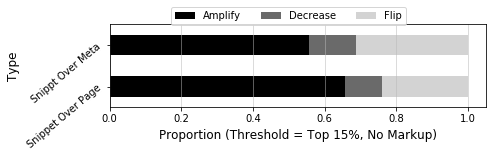

In [21]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)
df_type = df_add_topic
print("len of ori:", len(df_type))
df_type = df_type[pd.isnull(df_type["Markup_Category"])]
print("len of no-markup:", len(df_type))


df_type_t1 = df_type[(df_type["visible_text_score_t1"]!=0) & (df_type["snip_score_t1"]!=0)& (df_type["allmeta_score_t1"]!=0)]
print("len t1, should be same:", len(df_type_t1))
pro_snip_page_am = len(df_type_t1[df_type_t1["snip_text_type_t1"]==1])/len(df_type_t1)
pro_snip_page_de = len(df_type_t1[df_type_t1["snip_text_type_t1"]==2])/len(df_type_t1)
pro_snip_page_fl = len(df_type_t1[df_type_t1["snip_text_type_t1"]==3])/len(df_type_t1)
print(pro_snip_page_am)
print(pro_snip_page_de)
print(pro_snip_page_fl)
print(pro_snip_page_fl+pro_snip_page_de+pro_snip_page_am)
pro_snip_meta_am = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==1])/len(df_type_t1)
pro_snip_meta_de = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==2])/len(df_type_t1)
pro_snip_meta_fl = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==3])/len(df_type_t1)

df_plot = pd.DataFrame({
    "type":["Snippet Over Page", "Snippt Over Meta"],
    "Amplify":[pro_snip_page_am, pro_snip_meta_am],
    "Decrease":[pro_snip_page_de, pro_snip_meta_de],
    "Flip":[pro_snip_page_fl, pro_snip_meta_fl]
    
})
#df_plot

from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,2))
df_plot.set_index('type',inplace=True)
print(df_plot)
#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_plot.plot(ax=ax, kind='barh', legend=False, stacked=True,colormap=cmap2)


ax.legend(loc='center right', bbox_to_anchor=(0.8, 1.1), ncol=3)
ax.set_xlabel('Proportion (Threshold = Top 15%, No Markup)',size=12, labelpad=5)
ax.set_ylabel('Type',size=12, labelpad=5)
#print(s)
#ax.set_ylabel('Topic',size=12, labelpad=5)
#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax.grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax.get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=5.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect \n Over Page and Meta Text (No Markup, Threshold = Top 15%)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
#fig.savefig('overall_effect_of_snip_over_meta_and_page_top_15_date_10_26.pdf', dpi=300)


len of ori: 258360
len of no-markup: 43029
len t1, should be same: 42640
0.6849906191369606
0.08142589118198874
0.23358348968105067
1.0
                    Amplify  Decrease      Flip
type                                           
Snippet Over Page  0.684991  0.081426  0.233583
Snippt Over Meta   0.590150  0.085999  0.323851


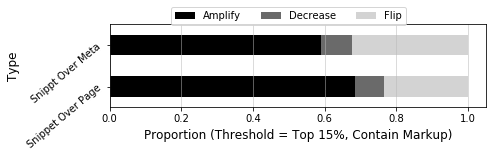

In [22]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)
df_type = df_add_topic
print("len of ori:", len(df_type))
df_type = df_type[~pd.isnull(df_type["Markup_Category"])]
print("len of no-markup:", len(df_type))


df_type_t1 = df_type[(df_type["visible_text_score_t1"]!=0) & (df_type["snip_score_t1"]!=0)& (df_type["allmeta_score_t1"]!=0)]
print("len t1, should be same:", len(df_type_t1))
pro_snip_page_am = len(df_type_t1[df_type_t1["snip_text_type_t1"]==1])/len(df_type_t1)
pro_snip_page_de = len(df_type_t1[df_type_t1["snip_text_type_t1"]==2])/len(df_type_t1)
pro_snip_page_fl = len(df_type_t1[df_type_t1["snip_text_type_t1"]==3])/len(df_type_t1)
print(pro_snip_page_am)
print(pro_snip_page_de)
print(pro_snip_page_fl)
print(pro_snip_page_fl+pro_snip_page_de+pro_snip_page_am)
pro_snip_meta_am = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==1])/len(df_type_t1)
pro_snip_meta_de = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==2])/len(df_type_t1)
pro_snip_meta_fl = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==3])/len(df_type_t1)

df_plot = pd.DataFrame({
    "type":["Snippet Over Page", "Snippt Over Meta"],
    "Amplify":[pro_snip_page_am, pro_snip_meta_am],
    "Decrease":[pro_snip_page_de, pro_snip_meta_de],
    "Flip":[pro_snip_page_fl, pro_snip_meta_fl]
    
})
#df_plot

from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,2))
df_plot.set_index('type',inplace=True)
print(df_plot)

df_plot.plot(ax=ax, kind='barh', legend=False, stacked=True,colormap=cmap2)



ax.legend(loc='center right', bbox_to_anchor=(0.8, 1.1), ncol=3)
ax.set_xlabel('Proportion (Threshold = Top 15%, Contain Markup)',size=12, labelpad=5)
ax.set_ylabel('Type',size=12, labelpad=5)

#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax.grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax.get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=5.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page and Meta Text (Include Markup, Threshold = Top 15%)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
#fig.savefig('overall_effect_of_snip_over_meta_and_page_top_15_date_10_26.pdf', dpi=300)



len t1: 246645
0.662263577206106
0.09740720468689817
0.2403292181069959
1.0
len t2: 113795
0.6668746429983743
0.1422733863526517
0.19085197064897402
1.0
                    Amplify  Decrease      Flip
type                                           
Snippet Over Page  0.684991  0.081426  0.233583
Snippt Over Meta   0.590150  0.085999  0.323851
                    Amplify  Decrease      Flip
type                                           
Snippet Over Page  0.666875  0.142273  0.190852
Snippt Over Meta   0.500962  0.235028  0.264010


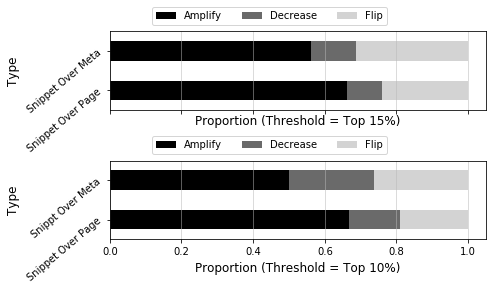

In [52]:
path_add_party_and_topic = "/Users/deshenghu/Desktop/search-text/summary/10-15/final_analysis_plots/data/final_merge_all_score_remove_nan_gap_visible_t1_add_root_party_markup.csv"
df_add_topic = pd.read_csv(path_add_party_and_topic)
df_type = df_add_topic

df_type_t1 = df_type[(df_type["visible_text_score_t1"]!=0) & (df_type["snip_score_t1"]!=0)& (df_type["allmeta_score_t1"]!=0)]
print("len t1:", len(df_type_t1))
pro_snip_page_am_t1 = len(df_type_t1[df_type_t1["snip_text_type_t1"]==1])/len(df_type_t1)
pro_snip_page_de_t1 = len(df_type_t1[df_type_t1["snip_text_type_t1"]==2])/len(df_type_t1)
pro_snip_page_fl_t1 = len(df_type_t1[df_type_t1["snip_text_type_t1"]==3])/len(df_type_t1)
print(pro_snip_page_am_t1)
print(pro_snip_page_de_t1)
print(pro_snip_page_fl_t1)
print(pro_snip_page_fl_t1+pro_snip_page_de_t1+pro_snip_page_am_t1)
pro_snip_meta_am_t1 = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==1])/len(df_type_t1)
pro_snip_meta_de_t1 = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==2])/len(df_type_t1)
pro_snip_meta_fl_t1 = len(df_type_t1[df_type_t1["snip_meta_type_t1"]==3])/len(df_type_t1)

df_plot_t1 = pd.DataFrame({
    "type":["Snippet Over Page", "Snippet Over Meta"],
    "Amplify":[pro_snip_page_am_t1, pro_snip_meta_am_t1],
    "Decrease":[pro_snip_page_de_t1, pro_snip_meta_de_t1],
    "Flip":[pro_snip_page_fl_t1, pro_snip_meta_fl_t1]
    
})
#df_plot


df_type_t2 = df_type[(df_type["visible_text_score_t2"]!=0) & (df_type["snip_score_t2"]!=0)& (df_type["allmeta_score_t2"]!=0)]
print("len t2:", len(df_type_t2))
pro_snip_page_am = len(df_type_t2[df_type_t2["snip_text_type_t2"]==1])/len(df_type_t2)
pro_snip_page_de = len(df_type_t2[df_type_t2["snip_text_type_t2"]==2])/len(df_type_t2)
pro_snip_page_fl = len(df_type_t2[df_type_t2["snip_text_type_t2"]==3])/len(df_type_t2)
print(pro_snip_page_am)
print(pro_snip_page_de)
print(pro_snip_page_fl)
print(pro_snip_page_fl+pro_snip_page_de+pro_snip_page_am)
pro_snip_meta_am = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==1])/len(df_type_t2)
pro_snip_meta_de = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==2])/len(df_type_t2)
pro_snip_meta_fl = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==3])/len(df_type_t2)

df_plot_t2 = pd.DataFrame({
    "type":["Snippet Over Page", "Snippt Over Meta"],
    "Amplify":[pro_snip_page_am, pro_snip_meta_am],
    "Decrease":[pro_snip_page_de, pro_snip_meta_de],
    "Flip":[pro_snip_page_fl, pro_snip_meta_fl]
    
})



from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(7,4))
df_plot_t1.set_index('type',inplace=True)
print(df_plot)

df_plot_t1.plot(ax=ax[0], kind='barh', legend=False, stacked=True,colormap=cmap2)




ax[0].legend(loc='center right', bbox_to_anchor=(0.75, 1.2), ncol=3)
ax[0].set_xlabel('Proportion (Threshold = Top 15%)',size=12, labelpad=5)
ax[0].set_ylabel('Type',size=12, labelpad=5)

#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax[0].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.setp(ax[0].get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=5.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page Text by Topics \nand Leaning-Type(Red=Right_leaning Query, Blue=Left_leaning Query)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
#fig.savefig('overall_effect_of_snip_over_meta_and_page_top_15_date_10_26.pdf', dpi=300)


df_plot_t2.set_index('type',inplace=True)
print(df_plot_t2)
#ax2 = plt.figure(figsize=(10, 6)).add_subplot(122)
df_plot_t2.plot(ax=ax[1], kind='barh', legend=False, stacked=True,colormap=cmap2)





ax[1].legend(loc='center right', bbox_to_anchor=(0.75, 1.2), ncol=3)
ax[1].set_xlabel('Proportion (Threshold = Top 10%)',size=12, labelpad=5)
ax[1].set_ylabel('Type',size=12, labelpad=5)


#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax[1].grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax[1].get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=5.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page Text by Topics \nand Leaning-Type(Red=Right_leaning Query, Blue=Left_leaning Query)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
#fig.savefig('overall_effect_of_snip_over_meta_and_page_top_10_date_10_26.pdf', dpi=300)






len t2: 78263
0.6584592974969015
0.13486577309839898
0.20667492940469953
1.0
                    Amplify  Decrease      Flip
type                                           
Snippet Over Page  0.658459  0.134866  0.206675
Snippt Over Meta   0.504836  0.225304  0.269859
Text(0.5,17.2469,'Proportion (Threshold = Top 10%)')


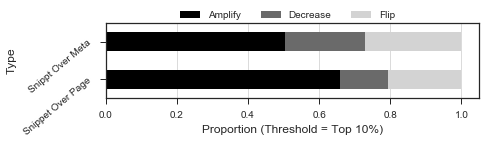

In [672]:
df_type_t2 = df_type[(df_type["visible_text_score_t2"]!=0) & (df_type["snip_score_t2"]!=0)& (df_type["allmeta_score_t2"]!=0)]
print("len t2:", len(df_type_t2))
pro_snip_page_am = len(df_type_t2[df_type_t2["snip_text_type_t2"]==1])/len(df_type_t2)
pro_snip_page_de = len(df_type_t2[df_type_t2["snip_text_type_t2"]==2])/len(df_type_t2)
pro_snip_page_fl = len(df_type_t2[df_type_t2["snip_text_type_t2"]==3])/len(df_type_t2)
print(pro_snip_page_am)
print(pro_snip_page_de)
print(pro_snip_page_fl)
print(pro_snip_page_fl+pro_snip_page_de+pro_snip_page_am)
pro_snip_meta_am = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==1])/len(df_type_t2)
pro_snip_meta_de = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==2])/len(df_type_t2)
pro_snip_meta_fl = len(df_type_t2[df_type_t2["snip_meta_type_t2"]==3])/len(df_type_t2)

df_plot_2 = pd.DataFrame({
    "type":["Snippet Over Page", "Snippt Over Meta"],
    "Amplify":[pro_snip_page_am, pro_snip_meta_am],
    "Decrease":[pro_snip_page_de, pro_snip_meta_de],
    "Flip":[pro_snip_page_fl, pro_snip_meta_fl]
    
})


from  matplotlib.colors import LinearSegmentedColormap
c = ['black', 'lightgray']
v = list(range(len(c)))
l = list(zip(v,c))
cmap2=LinearSegmentedColormap.from_list('rg',l, N=256)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,2))
df_plot_2.set_index('type',inplace=True)
print(df_plot_2)

df_plot_2.plot(ax=ax, kind='barh', legend=False, stacked=True,colormap=cmap2)





ax.legend(loc='center right', bbox_to_anchor=(0.8, 1.1), ncol=3)
ax.set_xlabel('Proportion (Threshold = Top 10%)',size=12, labelpad=5)
ax.set_ylabel('Type',size=12, labelpad=5)
print(s)

#fig.suptitle('Bias Amplifying Score Distribution by General Query Type', fontsize=12, x=.5, y=1)
ax.grid(b=True, axis='x', which='major', color='#b8b9b9', linewidth=0.5)
plt.setp(ax.get_yticklabels(), rotation=40, horizontalalignment='right')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,  wspace=0.2, hspace=5.6)
#fig.suptitle("Proportion of Snippet's Bias Amplifying, Decreasing, Flipping Effect Over Page Text by Topics \nand Leaning-Type(Red=Right_leaning Query, Blue=Left_leaning Query)", fontsize=12, x=.6, y=1.025)
fig.tight_layout(h_pad=-0.8)
fig.savefig('overall_effect_of_snip_over_meta_and_page_top_10_date_10_26.pdf', dpi=300)

